In [199]:
import numpy as np
import matplotlib.pyplot as plt

In [200]:
#funcao
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop3d(tamanho):
    pop = np.random.uniform(0 , 1 , size = (tamanho,3))
    #converter valores
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

## Primeiro caso de teste

In [201]:
#população inicial
npop = 100
pop=criaPop3d(npop)

#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)

#ordenação
pop_ord = pop[pop[0:, 3].argsort()]

#50% melhores
melhor_pop_inicial = pop_ord[0:50,:]
print(pop_ord.shape,melhor_pop_inicial.shape)

(100, 4) (50, 4)


In [202]:
#contagem de população estagnada
cont = 0
popMed=[]

for i in range(5000): #com 500000 iterações os valores chega na casa de 10**(-3)
    #segunda geracao
    if i==0:
        nova_melhor_pop = melhor_pop_inicial.copy()

        #nova população
        nova_pop = criaPop3d(50)

        #fitness da nova população
        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        #melhor pop anterior + nova população
        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        #reordena
        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]
    
        #acumula pop fit
        popMed.append(melhor_pop[0:,3])
        
        #comparação entre populações
        comparacao = np.array_equal(melhor_pop, melhor_pop_inicial)
        
        #contagem de populações semelhantes (!ta errado!)
        if comparacao == True:
            cont = cont+1
    
    #gerações posteriores
    elif i>0:       
        nova_melhor_pop = melhor_pop[0:50,:]

        nova_pop = criaPop3d(50)

        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]
        
        #acumula pop fit
        popMed.append(melhor_pop[0:,3])
        
        comparacao = np.array_equal(nova_melhor_pop, melhor_pop)
        if comparacao == True:
            cont = cont+1
            
#media e desvio padrao dos fits
popMed.append(sum(popMed)/len(popMed)) #media na penultima coluna
popMed.append(np.std(popMed,axis=0)) #desvio na ultima coluna
popMed = np.array(popMed).T
#print(melhor_pop.shape)

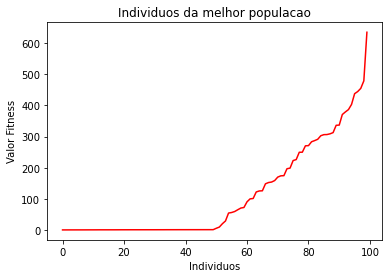

In [204]:
plt.title("Individuos da melhor populacao")
plt.xlabel("Individuos")
plt.ylabel("Valor Fitness")
plt.plot(melhor_pop[:,-1], color = "red", label = "")
#o fit dos melhores individuos fica semelhante a cada geração

In [ ]:
plt.title("Média e desvio padrão entre os fitness das populações")
plt.xlabel("Fitness das gerações")
plt.ylabel("Desvio padrão")
plt.plot(popMed[:,-1], color = "red", label = "Desvio padrão")
plt.plot(popMed[:,-2], color = "blue", label = "Média")
plt.legend()

## Segundo caso de teste

## Terceiro caso de teste